In [ ]:
!pip install plotnine

In [42]:
import pandas as pd
import numpy as np
import datetime
import requests
import re
import math
import os
import _pickle as pickle
from datetime import date, timedelta
from bs4 import BeautifulSoup
from plotnine import *
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [43]:
def all_mondays(year):  # Utility method to fetch all mondays in a given year
    return pd.date_range(start=str(year), end=str(year + 1), freq='W-MON').tolist()

def all_ranking_days():
    days = []
    firstRanking = pd.to_datetime(pd.Timestamp(year=2015, month=10, day=26))
    for i in range(2015, 2021):
        days += all_mondays(i)

    tuedays = []
    for day in days:
        d = day.to_pydatetime()
        print(d)
        if d >= firstRanking:
            tuedays.append(d)

    return tuedays

In [44]:
months = {
    1: "january",
    2: "february",
    3: "march",
    4: "april",
    5: "may",
    6: "june",
    7: "july",
    8: "august",
    9: "september",
    10: "october",
    11: "november",
    12: "december"
}

def scrape_rankings():
    days = all_ranking_days() # call utility function to get the ranking days in our range
    rows = []
    for i in range(0, len(days)): # iterate through the days
        day = days[i]
        next_day = days[i + 1] - \
            datetime.timedelta(days=1) if i < len(days) - 1 else date.today()
        # construction of URL
        url = "https://www.hltv.org/ranking/teams/" + \
            str(day.year) + "/" + \
            months[day.month] + "/" + str(day.day)
        page = requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        team_list = soup.findAll("div", class_="ranked-team standard-box")
        pattern = re.compile("\#(\d+)")
        res = []
        for team in team_list: # iterate through teams in the week's ranking and get desired fields
            rank = pattern.match(
                team.find("span", class_="position").text).groups(1)[0]
            name = team.find("span", class_="name").text
            players = team.findAll("div", class_="nick")
            playernames = [player.text for player in players]
            date_range = pd.date_range(start=day, end=next_day)
            for d in date_range:
                res.append([d, name, rank, playernames]) # add 1 entry to the final data for every day in that week

        rows += res

    df = pd.DataFrame(data=rows, columns=["date", "name", "rank", "players"])
    return df

In [45]:
ranking_df=scrape_rankings()
ranking_df.to_csv('rankings.csv')
ranking_df

2015-01-05 00:00:00
2015-01-12 00:00:00
2015-01-19 00:00:00
2015-01-26 00:00:00
2015-02-02 00:00:00
2015-02-09 00:00:00
2015-02-16 00:00:00
2015-02-23 00:00:00
2015-03-02 00:00:00
2015-03-09 00:00:00
2015-03-16 00:00:00
2015-03-23 00:00:00
2015-03-30 00:00:00
2015-04-06 00:00:00
2015-04-13 00:00:00
2015-04-20 00:00:00
2015-04-27 00:00:00
2015-05-04 00:00:00
2015-05-11 00:00:00
2015-05-18 00:00:00
2015-05-25 00:00:00
2015-06-01 00:00:00
2015-06-08 00:00:00
2015-06-15 00:00:00
2015-06-22 00:00:00
2015-06-29 00:00:00
2015-07-06 00:00:00
2015-07-13 00:00:00
2015-07-20 00:00:00
2015-07-27 00:00:00
2015-08-03 00:00:00
2015-08-10 00:00:00
2015-08-17 00:00:00
2015-08-24 00:00:00
2015-08-31 00:00:00
2015-09-07 00:00:00
2015-09-14 00:00:00
2015-09-21 00:00:00
2015-09-28 00:00:00
2015-10-05 00:00:00
2015-10-12 00:00:00
2015-10-19 00:00:00
2015-10-26 00:00:00
2015-11-02 00:00:00
2015-11-09 00:00:00
2015-11-16 00:00:00
2015-11-23 00:00:00
2015-11-30 00:00:00
2015-12-07 00:00:00
2015-12-14 00:00:00


,date,name,rank,players
0,2015-10-26,TSM,1,"[karrigan, cajunb, Xyp9x, dupreeh, device]"
1,2015-10-27,TSM,1,"[karrigan, cajunb, Xyp9x, dupreeh, device]"
2,2015-10-28,TSM,1,"[karrigan, cajunb, Xyp9x, dupreeh, device]"
3,2015-10-29,TSM,1,"[karrigan, cajunb, Xyp9x, dupreeh, device]"
4,2015-10-30,TSM,1,"[karrigan, cajunb, Xyp9x, dupreeh, device]"
...,...,...,...,...
65298,2022-02-09,Triumph,30,"[Shakezullah, junior, Bwills, penny]"
65299,2022-02-10,Triumph,30,"[Shakezullah, junior, Bwills, penny]"
65300,2022-02-11,Triumph,30,"[Shakezullah, junior, Bwills, penny]"
65301,2022-02-12,Triumph,30,"[Shakezullah, junior, Bwills, penny]"


In [47]:
ranking_filepath = "D:\datascienceProject/rankings.csv"

if not os.path.exists(ranking_filepath):
    rankings_df = scrape_rankings()
    rankings_df.to_csv(ranking_pickle_filepath)
else:
    rankings_df = pd.read_csv(ranking_filepath)

rankings_df

,Unnamed: 0,date,name,rank,players
0,0,2015-10-26,TSM,1,"['karrigan', 'cajunb', 'Xyp9x', 'dupreeh', 'de..."
1,1,2015-10-27,TSM,1,"['karrigan', 'cajunb', 'Xyp9x', 'dupreeh', 'de..."
2,2,2015-10-28,TSM,1,"['karrigan', 'cajunb', 'Xyp9x', 'dupreeh', 'de..."
3,3,2015-10-29,TSM,1,"['karrigan', 'cajunb', 'Xyp9x', 'dupreeh', 'de..."
4,4,2015-10-30,TSM,1,"['karrigan', 'cajunb', 'Xyp9x', 'dupreeh', 'de..."
...,...,...,...,...,...
65298,65298,2022-02-09,Triumph,30,"['Shakezullah', 'junior', 'Bwills', 'penny']"
65299,65299,2022-02-10,Triumph,30,"['Shakezullah', 'junior', 'Bwills', 'penny']"
65300,65300,2022-02-11,Triumph,30,"['Shakezullah', 'junior', 'Bwills', 'penny']"
65301,65301,2022-02-12,Triumph,30,"['Shakezullah', 'junior', 'Bwills', 'penny']"


In [48]:
players_link = "https://www.hltv.org/stats/players?startDate=all&matchType=Lan&rankingFilter=Top30"

def scrape_player_links():
    page = requests.get(players_link)
    soup = BeautifulSoup(page.content, "html.parser")
    players_table = soup.find(
        "table", class_="stats-table player-ratings-table")
    table_body = players_table.find("tbody")
    player_cells = table_body.findAll("tr")
    player_links = {}
    for player_cell in player_cells:
        player_col = player_cell.find("td", class_="playerCol")
        player_link_tag = player_col.find("a")
        player_link = player_link_tag["href"]
        player_name = player_link_tag.text
        player_links[player_name] = "https://www.hltv.org" + player_link

    return player_links

In [49]:
def scrape_player_data(links):
    data = []
    score_pattern = re.compile("\((\d+)\)") # regex pattern that will help a lot with the fields on this page
    kd_pattern = re.compile("(\d+) - (\d+)") # another regex pattern that will help a lot
    for player, link in links.items(): # iterate through each link
        matches_link = link.replace("/players", "/players/matches") # get to the matches page from the player's overview page
        page = requests.get(matches_link)
        soup = BeautifulSoup(page.content, "html.parser")
        stats_table = soup.find("table")
        table_body = stats_table.find("tbody")
        match_rows = table_body.findAll("tr")
        for match_row in match_rows: # go through all the matches the player has on record and pull out the desired fields
            cells = match_row.findAll("td")
            date = cells[0].find("div", class_="time").text.strip()
            team = cells[1].findAll("span")[0].text.strip()
            rounds_text = cells[1].findAll("span")[1].text.strip()
            team_rounds = score_pattern.match(rounds_text).group(1)
            opposing_team = cells[2].findAll("span")[0].text.strip()
            opposing_team_rounds = score_pattern.match(
                cells[2].findAll("span")[1].text.strip()).group(1)
            map_played = cells[3].text.strip()
            kills = kd_pattern.match(cells[4].text.strip()).group(1)
            deaths = kd_pattern.match(cells[4].text.strip()).group(2)
            differential = cells[5].text.strip()
            rating = cells[6].text.strip()
            data.append([player, date, team, team_rounds, opposing_team,
                         opposing_team_rounds, map_played, kills, deaths, differential, rating])

    columns = ["player", "date", "team", "team_rounds", "opposing_team",
               "opposing_team_rounds", "map", "kills", "deaths", "differential", "rating"]
    df = pd.DataFrame(data=data, columns=columns)

    return df

In [51]:
matches_filepath = "D:\datascienceProject/Players.csv"

if not os.path.exists(matches_filepath):
    player_links = scrape_player_links()
    player_data = scrape_player_data(player_links)
    player_data.to_csv(matches_filepath)
else:
    player_data = pd.read_csv(matches_filepath)

player_data


,player,date,team,team_rounds,opposing_team,opposing_team_rounds,map,kills,deaths,differential,rating
0,s1mple,19/12/21,Natus Vincere,16,Gambit,6,inf,27,9,+18,1.92
1,s1mple,19/12/21,Natus Vincere,16,Gambit,11,anc,26,12,+14,1.74
2,s1mple,19/12/21,Natus Vincere,11,Gambit,16,mrg,24,19,+5,1.28
3,s1mple,19/12/21,Natus Vincere,16,Vitality,5,d2,22,10,+12,1.73
4,s1mple,19/12/21,Natus Vincere,16,Vitality,12,nuke,22,19,+3,1.24
...,...,...,...,...,...,...,...,...,...,...,...
36050,daps,8/11/15,Conquest,16,Dignitas,9,cbl,18,16,+2,1.13 *
36051,daps,7/11/15,Conquest,22,Liquid,18,cbl,14,32,-18,0.47 *
36052,daps,7/11/15,Conquest,16,Liquid,11,trn,18,18,0,0.94 *
36053,daps,7/11/15,Conquest,19,Virtus.pro,22,inf,20,34,-14,0.65 *


In [52]:
Clean_rankings_path = "D:\datascienceProject/rankings.csv"

if not os.path.exists(Clean_rankings_path):
    ranking_df["date"] = pd.to_datetime(rankings_df["date"], format="%Y-%m-%d")
    ranking_df.to_csv('rankings.csv')
else:
    ranking_df = pd.read_csv('rankings.csv')

ranking_df

,Unnamed: 0,date,name,rank,players
0,0,2015-10-26,TSM,1,"['karrigan', 'cajunb', 'Xyp9x', 'dupreeh', 'de..."
1,1,2015-10-27,TSM,1,"['karrigan', 'cajunb', 'Xyp9x', 'dupreeh', 'de..."
2,2,2015-10-28,TSM,1,"['karrigan', 'cajunb', 'Xyp9x', 'dupreeh', 'de..."
3,3,2015-10-29,TSM,1,"['karrigan', 'cajunb', 'Xyp9x', 'dupreeh', 'de..."
4,4,2015-10-30,TSM,1,"['karrigan', 'cajunb', 'Xyp9x', 'dupreeh', 'de..."
...,...,...,...,...,...
65298,65298,2022-02-09,Triumph,30,"['Shakezullah', 'junior', 'Bwills', 'penny']"
65299,65299,2022-02-10,Triumph,30,"['Shakezullah', 'junior', 'Bwills', 'penny']"
65300,65300,2022-02-11,Triumph,30,"['Shakezullah', 'junior', 'Bwills', 'penny']"
65301,65301,2022-02-12,Triumph,30,"['Shakezullah', 'junior', 'Bwills', 'penny']"


In [53]:
def get_opponent_rank(opponent, date):
    subset = ranking_df[ranking_df["date"] == date] # get rankings at that date
    if len(subset) == 0:
        return -1
    rows = subset[subset["name"] == opponent]
    if(len(rows) == 0):
        return -1
    row = rows.iloc[[0]]
    if len(row) == 0:
        return -1
    return row["rank"].iloc[0]

In [63]:
tidied_player_data_path = "D:\datascienceProject/Players.csv"

if os.path.exists(tidied_player_data_path):
    # correct data formats

    player_data["date"] = pd.to_datetime(player_data["date"], format="%d/%m/%y")
    player_data["team_rounds"] = pd.to_numeric(player_data["team_rounds"])
    player_data["opposing_team_rounds"] = pd.to_numeric(player_data["opposing_team_rounds"])
    player_data["kills"] = pd.to_numeric(player_data["kills"])
    player_data["deaths"] = pd.to_numeric(player_data["deaths"])
    player_data["differential"] = pd.to_numeric(player_data["differential"])
    player_data["rating"] = player_data["rating"].replace(to_replace="\*", value="", regex=True)
    # player_data["rating"] = player_data["rating"].str.strip()

    # adding necessary fields
    player_data["win"] = player_data["team_rounds"] > player_data["opposing_team_rounds"]
    player_data["kdr"] = player_data["kills"] / player_data["deaths"]
    player_data["kpr"] = player_data["kills"] / \
        (player_data["team_rounds"] + player_data["opposing_team_rounds"])

    player_data["opposing_team_rank"] = -1  # just to create the column
    player_data["team_rank"] = -1
    for index, row in player_data.iterrows():
        player_data.at[index, "opposing_team_rank"] = get_opponent_rank(
            row["opposing_team"], row["date"])
        player_data.at[index, "team_rank"] = get_opponent_rank(
            row["team"], row["date"])

    player_data["opposing_team_rank"] = pd.to_numeric(player_data["opposing_team_rank"])
    player_data["team_rank"] = pd.to_numeric(player_data["team_rank"])
    
    player_data["rank_differential"] = player_data.apply(lambda row: 31 if row["team_rank"] == -1 or row["opposing_team_rank"] == -1 else row["opposing_team_rank"] - row["team_rank"], axis=1)

    # filtering matches to fit desired timeframe
    start = pd.to_datetime('2015-10-26')
    end = pd.to_datetime('2019-12-30')
    player_data = player_data.query(
        'date > @start and date < @end').reset_index(drop=True)

    player_data.to_csv(tidied_player_data_path)

else:
     player_data = pd.read_csv(tidied_player_data_path)
    
player_data

,Unnamed: 0,player,date,team,team_rounds,opposing_team,opposing_team_rounds,map,kills,deaths,differential,rating,win,kdr,kpr,opposing_team_rank,team_rank,rank_differential
0,87,s1mple,2019-12-21,Natus Vincere,14,Evil Geniuses,16,d2,22,20,2,1.07,False,1.100000,0.733333,-1,-1,31
1,88,s1mple,2019-12-21,Natus Vincere,10,Evil Geniuses,16,mrg,16,18,-2,0.94,False,0.888889,0.615385,-1,-1,31
2,89,s1mple,2019-12-19,Natus Vincere,16,Heroic,9,inf,21,13,8,1.42,True,1.615385,0.840000,-1,-1,31
3,90,s1mple,2019-12-19,Natus Vincere,16,Heroic,6,trn,24,10,14,1.80,True,2.400000,1.090909,-1,-1,31
4,91,s1mple,2019-12-19,Natus Vincere,9,Heroic,16,nuke,20,16,4,1.11,False,1.250000,0.800000,-1,-1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33147,36050,daps,2015-11-08,Conquest,16,Dignitas,9,cbl,18,16,2,1.13,True,1.125000,0.720000,-1,-1,31
33148,36051,daps,2015-11-07,Conquest,22,Liquid,18,cbl,14,32,-18,0.47,True,0.437500,0.350000,-1,-1,31
33149,36052,daps,2015-11-07,Conquest,16,Liquid,11,trn,18,18,0,0.94,True,1.000000,0.666667,-1,-1,31
33150,36053,daps,2015-11-07,Conquest,19,Virtus.pro,22,inf,20,34,-14,0.65,False,0.588235,0.487805,-1,-1,31


In [64]:
def importance(row):
    if row["rank_differential"] <= 2:
        return 1.5
    elif row["rank_differential"] <= 5:
        return (3 / (row["rank_differential"] + 1) + 0.5)
    else:
        return 1

if importance not in player_data:
    player_data["importance"] = player_data.apply(importance, axis=1)
    player_data.to_csv(matches_path)
    
player_data.head()

,Unnamed: 0,player,date,team,team_rounds,opposing_team,opposing_team_rounds,map,kills,deaths,differential,rating,win,kdr,kpr,opposing_team_rank,team_rank,rank_differential,importance
0,87,s1mple,2019-12-21,Natus Vincere,14,Evil Geniuses,16,d2,22,20,2,1.07,False,1.100000,0.733333,-1,-1,31,1
1,88,s1mple,2019-12-21,Natus Vincere,10,Evil Geniuses,16,mrg,16,18,-2,0.94,False,0.888889,0.615385,-1,-1,31,1
2,89,s1mple,2019-12-19,Natus Vincere,16,Heroic,9,inf,21,13,8,1.42,True,1.615385,0.840000,-1,-1,31,1
3,90,s1mple,2019-12-19,Natus Vincere,16,Heroic,6,trn,24,10,14,1.80,True,2.400000,1.090909,-1,-1,31,1
4,91,s1mple,2019-12-19,Natus Vincere,9,Heroic,16,nuke,20,16,4,1.11,False,1.250000,0.800000,-1,-1,31,1


In [65]:
player_data["rating"] = pd.to_numeric(player_data["rating"])
player_data["performance"] = player_data["importance"] * player_data["rating"]

player_data

,Unnamed: 0,player,date,team,team_rounds,opposing_team,opposing_team_rounds,map,kills,deaths,differential,rating,win,kdr,kpr,opposing_team_rank,team_rank,rank_differential,importance,performance
0,87,s1mple,2019-12-21,Natus Vincere,14,Evil Geniuses,16,d2,22,20,2,1.07,False,1.100000,0.733333,-1,-1,31,1,1.07
1,88,s1mple,2019-12-21,Natus Vincere,10,Evil Geniuses,16,mrg,16,18,-2,0.94,False,0.888889,0.615385,-1,-1,31,1,0.94
2,89,s1mple,2019-12-19,Natus Vincere,16,Heroic,9,inf,21,13,8,1.42,True,1.615385,0.840000,-1,-1,31,1,1.42
3,90,s1mple,2019-12-19,Natus Vincere,16,Heroic,6,trn,24,10,14,1.80,True,2.400000,1.090909,-1,-1,31,1,1.80
4,91,s1mple,2019-12-19,Natus Vincere,9,Heroic,16,nuke,20,16,4,1.11,False,1.250000,0.800000,-1,-1,31,1,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33147,36050,daps,2015-11-08,Conquest,16,Dignitas,9,cbl,18,16,2,1.13,True,1.125000,0.720000,-1,-1,31,1,1.13
33148,36051,daps,2015-11-07,Conquest,22,Liquid,18,cbl,14,32,-18,0.47,True,0.437500,0.350000,-1,-1,31,1,0.47
33149,36052,daps,2015-11-07,Conquest,16,Liquid,11,trn,18,18,0,0.94,True,1.000000,0.666667,-1,-1,31,1,0.94
33150,36053,daps,2015-11-07,Conquest,19,Virtus.pro,22,inf,20,34,-14,0.65,False,0.588235,0.487805,-1,-1,31,1,0.65


In [66]:
player_data["performance_residual"] = player_data["performance"] - player_data["rating"]
player_data

,Unnamed: 0,player,date,team,team_rounds,opposing_team,opposing_team_rounds,map,kills,deaths,...,rating,win,kdr,kpr,opposing_team_rank,team_rank,rank_differential,importance,performance,performance_residual
0,87,s1mple,2019-12-21,Natus Vincere,14,Evil Geniuses,16,d2,22,20,...,1.07,False,1.100000,0.733333,-1,-1,31,1,1.07,0.0
1,88,s1mple,2019-12-21,Natus Vincere,10,Evil Geniuses,16,mrg,16,18,...,0.94,False,0.888889,0.615385,-1,-1,31,1,0.94,0.0
2,89,s1mple,2019-12-19,Natus Vincere,16,Heroic,9,inf,21,13,...,1.42,True,1.615385,0.840000,-1,-1,31,1,1.42,0.0
3,90,s1mple,2019-12-19,Natus Vincere,16,Heroic,6,trn,24,10,...,1.80,True,2.400000,1.090909,-1,-1,31,1,1.80,0.0
4,91,s1mple,2019-12-19,Natus Vincere,9,Heroic,16,nuke,20,16,...,1.11,False,1.250000,0.800000,-1,-1,31,1,1.11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33147,36050,daps,2015-11-08,Conquest,16,Dignitas,9,cbl,18,16,...,1.13,True,1.125000,0.720000,-1,-1,31,1,1.13,0.0
33148,36051,daps,2015-11-07,Conquest,22,Liquid,18,cbl,14,32,...,0.47,True,0.437500,0.350000,-1,-1,31,1,0.47,0.0
33149,36052,daps,2015-11-07,Conquest,16,Liquid,11,trn,18,18,...,0.94,True,1.000000,0.666667,-1,-1,31,1,0.94,0.0
33150,36053,daps,2015-11-07,Conquest,19,Virtus.pro,22,inf,20,34,...,0.65,False,0.588235,0.487805,-1,-1,31,1,0.65,0.0


In [67]:
averages = player_data.groupby(["player"]).mean()

averages.sort_values(by=["performance_residual"], ascending=False).head(20)

,Unnamed: 0,team_rounds,opposing_team_rounds,kills,deaths,differential,rating,win,kdr,kpr,opposing_team_rank,team_rank,rank_differential,importance,performance,performance_residual
player,,,,,,,,,,,,,,,,
AMANEK,18330.0,13.746544,13.308756,18.271889,17.281106,0.990783,1.090599,0.529954,1.118418,0.674609,-1.0,-1.0,31.0,1.0,1.090599,0.0
device,1546.0,14.590829,11.560847,20.354497,15.964727,4.389771,1.246861,0.670194,1.448441,0.788949,-1.0,-1.0,31.0,1.0,1.246861,0.0
flusha,20123.5,13.495575,12.710177,17.796460,17.553097,0.243363,1.083938,0.555310,1.099958,0.679256,-1.0,-1.0,31.0,1.0,1.083938,0.0
flamie,14160.5,13.812963,12.411111,18.433333,17.248148,1.185185,1.109759,0.583333,1.160178,0.706213,-1.0,-1.0,31.0,1.0,1.109759,0.0
fer,12447.0,13.768049,12.542243,19.144393,18.136713,1.007680,1.141736,0.562212,1.134775,0.732367,-1.0,-1.0,31.0,1.0,1.141736,0.0
felps,23355.0,13.579505,12.434629,18.480565,18.798587,-0.318021,1.095230,0.572438,1.046614,0.715196,-1.0,-1.0,31.0,1.0,1.095230,0.0
f0rest,11563.5,13.060538,13.038117,18.742152,17.363229,1.378924,1.091211,0.495516,1.165215,0.716847,-1.0,-1.0,31.0,1.0,1.091211,0.0
electroNic,2713.5,13.847222,12.636111,19.930556,16.861111,3.069444,1.202083,0.577778,1.296479,0.752394,-1.0,-1.0,31.0,1.0,1.202083,0.0
dupreeh,8878.0,14.549053,11.567986,18.777969,16.925990,1.851979,1.148021,0.666093,1.235151,0.726335,-1.0,-1.0,31.0,1.0,1.148021,0.0


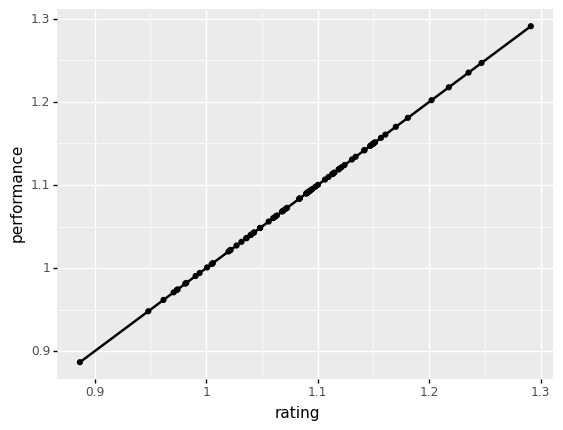

<ggplot: (173818361679)>

In [68]:
(ggplot(averages, aes(x='rating', y='performance'))
    + geom_point()
    + geom_smooth(method="lm"))


In [69]:
top_10 = []

subset = player_data.groupby(["player"]).mean().sort_values(by=["performance"], ascending=False).head(8).reset_index()

for index, row in subset.iterrows():
    top_10.append(row["player"])
    
player_data["top_10"] = player_data.apply(lambda row: row["player"] in top_10, axis=1)
player_data


,Unnamed: 0,player,date,team,team_rounds,opposing_team,opposing_team_rounds,map,kills,deaths,...,win,kdr,kpr,opposing_team_rank,team_rank,rank_differential,importance,performance,performance_residual,top_10
0,87,s1mple,2019-12-21,Natus Vincere,14,Evil Geniuses,16,d2,22,20,...,False,1.100000,0.733333,-1,-1,31,1,1.07,0.0,True
1,88,s1mple,2019-12-21,Natus Vincere,10,Evil Geniuses,16,mrg,16,18,...,False,0.888889,0.615385,-1,-1,31,1,0.94,0.0,True
2,89,s1mple,2019-12-19,Natus Vincere,16,Heroic,9,inf,21,13,...,True,1.615385,0.840000,-1,-1,31,1,1.42,0.0,True
3,90,s1mple,2019-12-19,Natus Vincere,16,Heroic,6,trn,24,10,...,True,2.400000,1.090909,-1,-1,31,1,1.80,0.0,True
4,91,s1mple,2019-12-19,Natus Vincere,9,Heroic,16,nuke,20,16,...,False,1.250000,0.800000,-1,-1,31,1,1.11,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33147,36050,daps,2015-11-08,Conquest,16,Dignitas,9,cbl,18,16,...,True,1.125000,0.720000,-1,-1,31,1,1.13,0.0,False
33148,36051,daps,2015-11-07,Conquest,22,Liquid,18,cbl,14,32,...,True,0.437500,0.350000,-1,-1,31,1,0.47,0.0,False
33149,36052,daps,2015-11-07,Conquest,16,Liquid,11,trn,18,18,...,True,1.000000,0.666667,-1,-1,31,1,0.94,0.0,False
33150,36053,daps,2015-11-07,Conquest,19,Virtus.pro,22,inf,20,34,...,False,0.588235,0.487805,-1,-1,31,1,0.65,0.0,False


In [70]:
new_df = player_data.groupby(["player"]).resample('6M', on="date").mean().sort_values(by=["performance"], ascending=False).reset_index()
new_df["date"] = pd.to_datetime(new_df["date"])

new_df

,player,date,Unnamed: 0,team_rounds,opposing_team_rounds,kills,deaths,differential,rating,win,kdr,kpr,opposing_team_rank,team_rank,rank_differential,importance,performance,performance_residual,top_10
0,twist,2016-02-29,21039.0,16.000000,7.800000,22.600000,13.200000,9.400000,1.528000,1.000000,1.888568,0.966763,-1.0,-1.0,31.0,1.0,1.528000,0.0,0.0
1,aizy,2015-10-31,21521.5,10.000000,16.000000,29.500000,19.000000,10.500000,1.515000,0.000000,1.536111,1.116667,-1.0,-1.0,31.0,1.0,1.515000,0.0,0.0
2,AMANEK,2018-10-31,18385.5,14.000000,9.750000,20.500000,13.500000,7.000000,1.437500,0.750000,1.591832,0.872314,-1.0,-1.0,31.0,1.0,1.437500,0.0,0.0
3,tabseN,2017-07-31,5951.0,14.172414,12.689655,23.551724,18.206897,5.344828,1.372759,0.620690,1.412880,0.884932,-1.0,-1.0,31.0,1.0,1.372759,0.0,0.0
4,s1mple,2018-08-31,314.0,14.428571,12.142857,23.389610,15.870130,7.519481,1.366623,0.675325,1.546146,0.887350,-1.0,-1.0,31.0,1.0,1.366623,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,felps,2018-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
719,friberg,2017-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720,stanislaw,2018-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,suNny,2017-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


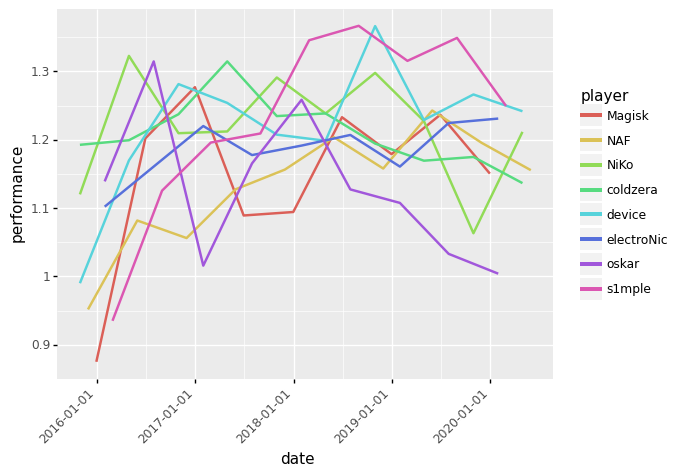

<ggplot: (173931721120)>

In [71]:
(ggplot(new_df[new_df["top_10"] == True], aes(x="date", y="performance"))
    + geom_line(aes(color="player"), size=1)
    + theme(axis_text_x=element_text(angle=45,hjust=1)))

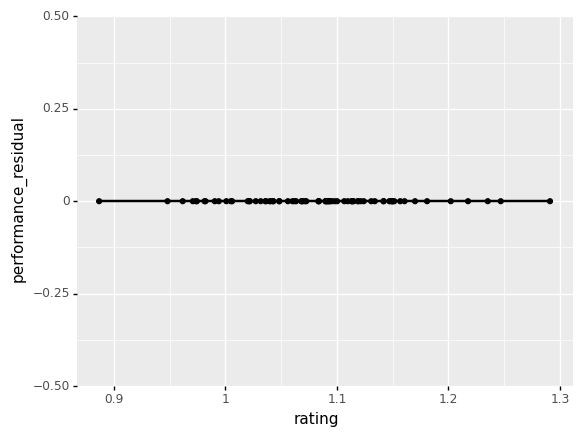

<ggplot: (173935199064)>

In [72]:
(ggplot(averages, aes(x="rating", y="performance_residual"))
    + geom_point()
    + geom_smooth(method="lm"))

In [73]:
most_played = player_data.groupby("team").count().sort_values(["performance"], ascending=False).head(8).reset_index()

teams = []
for index, row in most_played.iterrows():
    teams.append(row["team"])
    
player_data["top_10_most_played"] = player_data.apply(lambda row: row["team"] in teams, axis=1)

player_data

,Unnamed: 0,player,date,team,team_rounds,opposing_team,opposing_team_rounds,map,kills,deaths,...,kdr,kpr,opposing_team_rank,team_rank,rank_differential,importance,performance,performance_residual,top_10,top_10_most_played
0,87,s1mple,2019-12-21,Natus Vincere,14,Evil Geniuses,16,d2,22,20,...,1.100000,0.733333,-1,-1,31,1,1.07,0.0,True,True
1,88,s1mple,2019-12-21,Natus Vincere,10,Evil Geniuses,16,mrg,16,18,...,0.888889,0.615385,-1,-1,31,1,0.94,0.0,True,True
2,89,s1mple,2019-12-19,Natus Vincere,16,Heroic,9,inf,21,13,...,1.615385,0.840000,-1,-1,31,1,1.42,0.0,True,True
3,90,s1mple,2019-12-19,Natus Vincere,16,Heroic,6,trn,24,10,...,2.400000,1.090909,-1,-1,31,1,1.80,0.0,True,True
4,91,s1mple,2019-12-19,Natus Vincere,9,Heroic,16,nuke,20,16,...,1.250000,0.800000,-1,-1,31,1,1.11,0.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33147,36050,daps,2015-11-08,Conquest,16,Dignitas,9,cbl,18,16,...,1.125000,0.720000,-1,-1,31,1,1.13,0.0,False,False
33148,36051,daps,2015-11-07,Conquest,22,Liquid,18,cbl,14,32,...,0.437500,0.350000,-1,-1,31,1,0.47,0.0,False,False
33149,36052,daps,2015-11-07,Conquest,16,Liquid,11,trn,18,18,...,1.000000,0.666667,-1,-1,31,1,0.94,0.0,False,False
33150,36053,daps,2015-11-07,Conquest,19,Virtus.pro,22,inf,20,34,...,0.588235,0.487805,-1,-1,31,1,0.65,0.0,False,False


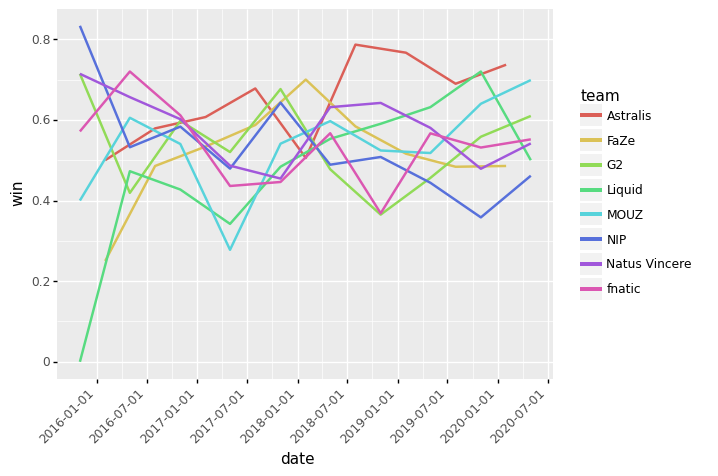

<ggplot: (173932434345)>

In [74]:
new_df_teams = player_data.groupby(["team"]).resample('6M', on="date").mean().reset_index()
new_df_teams["date"] = pd.to_datetime(new_df_teams["date"])

(ggplot(new_df_teams[new_df_teams["top_10_most_played"] == True], aes(x="date", y="win"))
    + geom_line(aes(color="team"), size=1)
    + theme(axis_text_x=element_text(angle=45,hjust=1)))

In [75]:
player_data.fillna(player_data.mean(), inplace=True) # four or 5 rows had NA for the rating for some reason, so we just replaced them with the mean rating (~1.0)

rows = []
for index, row in player_data.iterrows():
    feature_set = []
    feature_set.append(row["player"])
    feature_set.append(row["kills"])
    feature_set.append(row["deaths"])
    feature_set.append(row["kpr"])
    feature_set.append(row["map"])
    feature_set.append(row["opposing_team"])
    feature_set.append(row["rank_differential"])
    feature_set.append(1 if row["win"] else 0)
    rows.append(feature_set)
    
ml_df = pd.DataFrame(data=rows, columns=["player", "kills", "deaths", "kpr", "map", "opposing_team", "rank_differential", "result"])
ml_df.replace([np.inf, -np.inf], 31)

new_rows = []
for index, row in ml_df.iterrows():
    pset = []
    pset.append(row["player"])
    pset.append(row["opposing_team"])
    pset.append(row["map"])
    pset.append(row["result"])
    pset.append([row["kills"], row["deaths"], row["rank_differential"]])
    new_rows.append(pset)
    
ml_df = pd.DataFrame(data=new_rows, columns=["player", "opponent", "map", "result", "X"])
ml_df
        

C:\Users\TwoFa\AppData\Local\Temp/ipykernel_12048/4048062142.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
C:\Users\TwoFa\AppData\Local\Temp/ipykernel_12048/4048062142.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,player,opponent,map,result,X
0,s1mple,Evil Geniuses,d2,0,"[22, 20, 31]"
1,s1mple,Evil Geniuses,mrg,0,"[16, 18, 31]"
2,s1mple,Heroic,inf,1,"[21, 13, 31]"
3,s1mple,Heroic,trn,1,"[24, 10, 31]"
4,s1mple,Heroic,nuke,0,"[20, 16, 31]"
...,...,...,...,...,...
33147,daps,Dignitas,cbl,1,"[18, 16, 31]"
33148,daps,Liquid,cbl,1,"[14, 32, 31]"
33149,daps,Liquid,trn,1,"[18, 18, 31]"
33150,daps,Virtus.pro,inf,0,"[20, 34, 31]"


In [91]:
# Decision Tree
clf = DecisionTreeClassifier(random_state=0)
DTScore = cross_val_score(clf, ml_df['X'].tolist(), ml_df['result'].tolist(), cv=10).mean()
# LogisticRegression
LogCV = LogisticRegressionCV(cv=10
        ,random_state=777
        ,max_iter=10000
        ,fit_intercept=True)
LogCV.fit(ml_df['X'].tolist(), ml_df['result'].tolist())
LogScore = LogCV.scores_[1].mean()
# KNN
clf = KNeighborsClassifier()
KNNScore = cross_val_score(clf, ml_df['X'].tolist(), ml_df['result'].tolist(), cv=10).mean()
# RF
clf = RandomForestClassifier()
RFScore = cross_val_score(clf, ml_df['X'].tolist(), ml_df['result'].tolist(), cv=10).mean()


In [88]:
Re = pd.DataFrame(columns = ['Algorithm','Mean value of 10-CV score'])
Re['Algorithm'] = ['KNN','Decision Tree','Random Forest', 'LogisticRegression']
Re['Mean value of 10-CV score'] = [KNNScore,DTScore,RFScore,LogScore]
Re

,Algorithm,Mean value of 10-CV score
0,KNN,0.742941
1,Decision Tree,0.763996
2,Random Forest,0.764599
3,LogisticRegression,0.767761


In [84]:
def get_win_prediction(player, map_, kills, deaths, rank_difference, df, clf):
    ourSet = [kills, deaths, rank_difference]
    Al = df.loc[df['player'] == player]
    Al = Al.loc[df['map'] == map_]
    Ax = np.array(Al['X'].tolist()).mean(axis=0)
    
    X = list(np.subtract(ourSet, Ax))
    return "WIN" if clf.predict([X])[0] == 1 else "LOSS"

In [85]:
# The first game in the best of 3 was played on Vertigo (abbreviated vtg)
print("Vertigo:\n")

# Astralis
print("Astralis' Star Players:\n")
print("Prediction based on dupreeh\'s stats: " + get_win_prediction("dupreeh", "vtg", 11, 19, 5, ml_df, LogCV))
print("Prediction based on device\'s stats: " + get_win_prediction("device", "vtg", 23, 16, 5, ml_df, LogCV))

# G2
print("G2's Star Players:\n")
print("Prediction based on kennyS\'s stats: " + get_win_prediction("kennyS", "vtg", 14, 19, -5, ml_df, LogCV))

print("\n-----\n")

# The next game was on Overpass (abbreviated ovp)
print("Overpass:\n")

# Astralis
print("Astralis' Star Players:\n")
print("Prediction based on dupreeh\'s stats: " + get_win_prediction("dupreeh", "ovp", 21, 12, 5, ml_df, LogCV))
print("Prediction based on device\'s stats: " + get_win_prediction("device", "ovp", 29, 9, 5, ml_df, LogCV))

# G2
print("G2's Star Players:\n")
print("Prediction based on kennyS\'s stats: " + get_win_prediction("kennyS", "ovp", 15, 18, -5, ml_df, LogCV))

Vertigo:

Astralis' Star Players:

Prediction based on dupreeh's stats: LOSS
Prediction based on device's stats: WIN
G2's Star Players:

Prediction based on kennyS's stats: LOSS

-----

Overpass:

Astralis' Star Players:

Prediction based on dupreeh's stats: WIN
Prediction based on device's stats: WIN
G2's Star Players:

Prediction based on kennyS's stats: WIN


In [86]:
# The first game in the best of 3 was played on Dust 2 (abbreviated d2)
print("Dust2:\n")

# Astralis
print("Astralis' Star Players:\n")
print("Prediction based on dupreeh\'s stats: " + get_win_prediction("dupreeh", "d2", 24, 13, 6, ml_df, LogCV))
print("Prediction based on device\'s stats: " + get_win_prediction("device", "d2", 25, 13, 6, ml_df, LogCV))

# Faze
print("Faze's Star Players:\n")
print("Prediction based on NiKo\'s stats: " + get_win_prediction("NiKo", "d2", 15, 15, -6, ml_df, LogCV))
print("Prediction based on coldzera\'s stats: " + get_win_prediction("coldzera", "d2", 19, 19, -6, ml_df, LogCV))

print("\n-----\n")

# The next game was on Inferno (abbreviated inf)
print("Inferno:\n")

# Astralis
print("Astralis' Star Players:\n")
print("Prediction based on dupreeh\'s stats: " + get_win_prediction("dupreeh", "inf", 24, 12, 6, ml_df, LogCV))
print("Prediction based on device\'s stats: " + get_win_prediction("device", "inf", 22, 16, 6, ml_df, LogCV))

# Faze
print("Faze's Star Players:\n")
print("Prediction based on NiKo\'s stats: " + get_win_prediction("NiKo", "inf", 12, 19, -6, ml_df, LogCV))
print("Prediction based on coldzera\'s stats: " + get_win_prediction("coldzera", "inf", 13, 19, -6, ml_df, LogCV))

Dust2:

Astralis' Star Players:

Prediction based on dupreeh's stats: WIN
Prediction based on device's stats: WIN
Faze's Star Players:

Prediction based on NiKo's stats: WIN
Prediction based on coldzera's stats: WIN

-----

Inferno:

Astralis' Star Players:

Prediction based on dupreeh's stats: WIN
Prediction based on device's stats: WIN
Faze's Star Players:

Prediction based on NiKo's stats: LOSS
Prediction based on coldzera's stats: LOSS


In [87]:
print("Prediction based on rain\'s stats: " + get_win_prediction("rain", "d2", 11, 22, -6, ml_df, LogCV))

Prediction based on rain's stats: LOSS
